In [ ]:
# !pip install woma

In [1]:
import woma, inspect
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

In [2]:
R_earth = 6.371e6   # m
M_earth = 5.9724e24  # kg m^-3 

def plot_spherical_profiles(planet):    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))
    
    ax[0, 0].plot(planet.A1_r / R_earth, planet.A1_rho)
    ax[0, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 0].set_ylabel(r"Density, $\rho$ [kg m$^{-3}$]")
    ax[0, 0].set_yscale("log")
    ax[0, 0].set_xlim(0, None)
    
    ax[1, 0].plot(planet.A1_r / R_earth, planet.A1_m_enc / M_earth)
    ax[1, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 0].set_ylabel(r"Enclosed Mass, $M_{<r}$ $[M_\oplus]$")
    ax[1, 0].set_xlim(0, None)
    ax[1, 0].set_ylim(0, None)
    
    ax[0, 1].plot(planet.A1_r / R_earth, planet.A1_P)
    ax[0, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 1].set_ylabel(r"Pressure, $P$ [Pa]")
    ax[0, 1].set_yscale("log")
    ax[0, 1].set_xlim(0, None)
    
    ax[1, 1].plot(planet.A1_r / R_earth, planet.A1_T)
    ax[1, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 1].set_ylabel(r"Temperature, $T$ [K]")
    ax[1, 1].set_xlim(0, None)
    ax[1, 1].set_ylim(0, None)
    
    plt.tight_layout()
    plt.show()

def plot_spinning_profiles(sp):    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
        
    ax[0].plot(sp.planet.A1_r / R_earth, sp.planet.A1_rho, label="original spherical")
    ax[0].plot(sp.A1_R / R_earth, sp.A1_rho, label="equatorial")
    ax[0].plot(sp.A1_Z / R_earth, sp.A1_rho, label="polar")
    ax[0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0].set_ylabel(r"Density, $\rho$ [kg m$^{-3}$]")
    ax[0].set_yscale("log")
    ax[0].set_xlim(0, 1.1 * sp.R_eq / R_earth)
    ax[0].legend()
    
    for i, e in enumerate([
        Ellipse(
            xy=[0, 0],
            width=2 * sp.A1_R[i] / R_earth, 
            height=2 * sp.A1_Z[i] / R_earth,
            zorder=-i,
        )
        for i in range(len(sp.A1_R))
    ]):
        ax[1].add_artist(e)
        e.set_clip_box(ax[1].bbox)
        e.set_facecolor(plt.get_cmap("viridis")(
            (sp.A1_rho[i] - sp.rho_s) / (sp.rho_0 - sp.rho_s)
        ))
    
    ax[1].set_xlabel(r"Equatorial Radius, $r_{xy}$ $[R_\oplus]$")
    ax[1].set_ylabel(r"Polar Radius, $z$ $[R_\oplus]$")    
    ax[1].set_xlim(0, 1.1 * sp.R_eq / R_earth)
    ax[1].set_ylim(0, 1.1 * sp.R_po / R_earth)
    ax[1].set_aspect("equal")
    ax[1].set_title(r"Density [kg m$^{-3}$]")
    
    plt.tight_layout()
    plt.show()

In [3]:
planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "Til_basalt"],
    A1_T_rho_type   = ["power=2", "power=2"],
    P_s             = 1e5,
    T_s             = 1000,
    M               = M_earth,
    R               = R_earth,
)

# Generate the profiles
planet.gen_prof_L2_find_R1_given_M_R(verbosity=0)

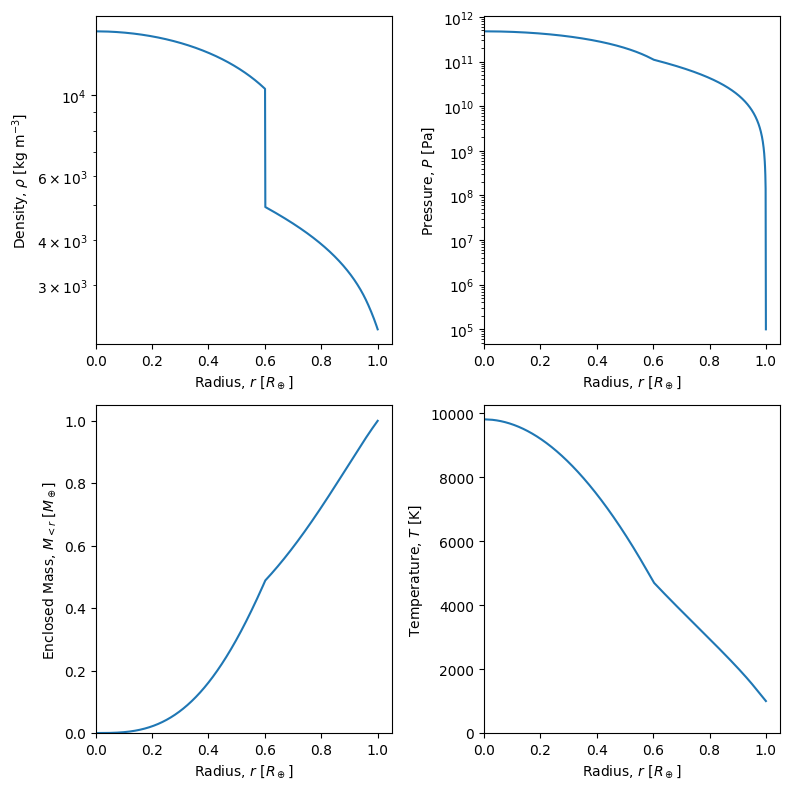

In [4]:
plot_spherical_profiles(planet)

In [5]:
spin_planet = woma.SpinPlanet(
    planet = planet,
    period = 4, # h
    fix_mass = False,
)

Iter 9(20): tol=0.00014(0.001)  
SpinPlanet "None": 
    planet       = "None"
    period       = 4  h
    M            = 6.4648e+24  kg  = 1.0825  M_earth
    R_eq         = 6.8365e+06  m  = 1.0731  R_earth
    R_po         = 6.0917e+06  m  = 0.95616  R_earth
    mat          = ["Til_iron", "Til_basalt"] 
    mat_id       = [100, 103] 
    R_layer      = [0.63063, 1.0731]  R_earth
    Z_layer      = [0.58087, 0.95634]  R_earth
    M_layer      = [0.51739, 0.56506]  M_earth
    M_frac_layer = [0.47798, 0.52202]  M_tot
    P_s          = 4.6153e+07  Pa
    T_s          = 1003.5  K
    rho_s        = 2273.4  kg m^-3
    P_1          = 1.1122e+11  Pa
    T_1          = 4740.1  K
    rho_1        = 10433  kg m^-3
    P_0          = 4.7443e+11  Pa
    T_0          = 9814.7  K
    rho_0        = 15012  kg m^-3
    I_MR2        = 0.29479  M_tot R_eq^2
    L            = 3.8865e+34  kg m^2 s^-1


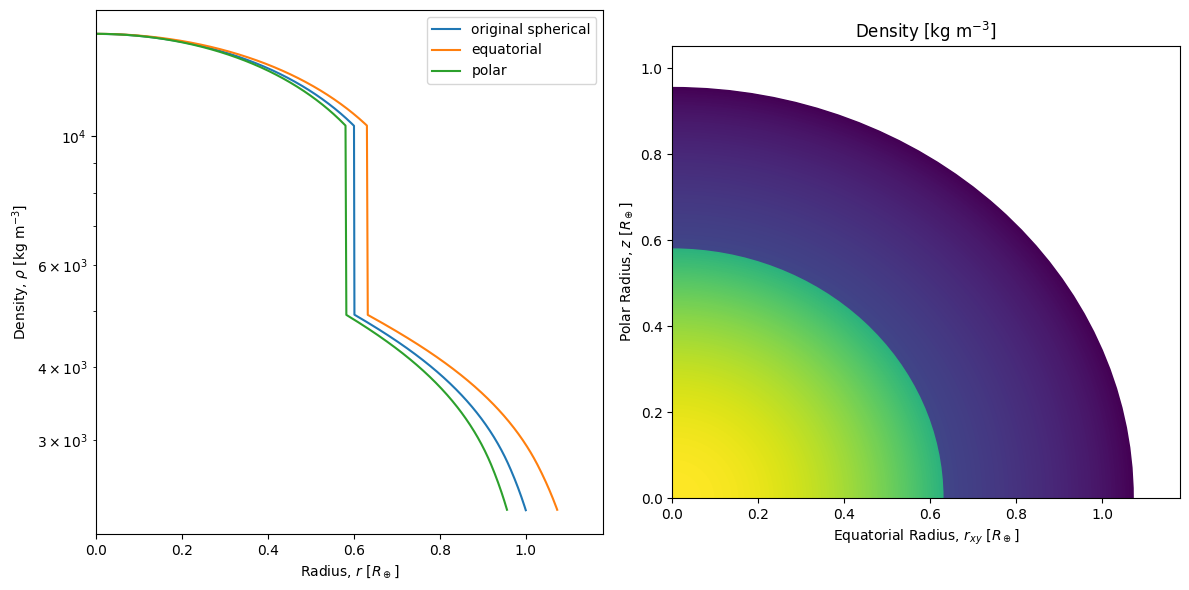

In [6]:
plot_spinning_profiles(spin_planet)

In [7]:
# Earth units
M_E = 5.9724e24  # kg
R_E = 6.3710e6  # m

# Set profile inputs
M_t = 0.887 * M_E
M_i = 0.133 * M_E
target_prof = woma.Planet(
    name="target",
    A1_mat_layer=["ANEOS_Fe85Si15", "ANEOS_forsterite"],
    A1_T_rho_type=["adiabatic", "adiabatic"],
    M=M_t,
    A1_M_layer=[M_t * 0.3, M_t * 0.7],
    P_s=1e5,
    T_s=2000,
)
impactor_prof = woma.Planet(
    name="impactor",
    A1_mat_layer=["ANEOS_Fe85Si15", "ANEOS_forsterite"],
    A1_T_rho_type=["adiabatic", "adiabatic"],
    M=M_i,
    A1_M_layer=[M_i * 0.3, M_i * 0.7],
    P_s=1e5,
    T_s=2000,
)

In [8]:
woma.load_eos_tables(
    np.unique(np.append(target_prof.A1_mat_layer, impactor_prof.A1_mat_layer))
)

In [9]:
target_prof.gen_prof_L2_find_R_R1_given_M1_M2(R_min=0.95 * R_E, R_max=1.05 * R_E)
impactor_prof.gen_prof_L2_find_R_R1_given_M1_M2(R_min=0.5 * R_E, R_max=0.6 * R_E)

Trying to build a planet with R=R_min... Success
Trying to build a planet with R=R_max... Success
Iter 9(40): R=0.9998R_E R1=0.51211R_E: tol=0.00055(0.001)  
Tweaking M to avoid density peaks at the center of the planet... Done
Planet "target": 
    M            = 5.2968e+24  kg  = 0.88687  M_earth
    R            = 6.3698e+06  m  = 0.9998  R_earth
    mat          = ["ANEOS_Fe85Si15", "ANEOS_forsterite"] 
    mat_id       = [402, 400] 
    T_rho_type   = ["adiabatic", "adiabatic"] 
    R_layer      = [0.51141, 0.9998]  R_earth
    M_layer      = [0.26614, 0.62073]  M_earth
    M_frac_layer = [0.30009, 0.69991]  M_tot
    idx_layer    = [511, 999] 
    P_s          = 1e+05  Pa
    T_s          = 2000  K
    rho_s        = 3053.2  kg m^-3
    P_1          = 1.1716e+11  Pa
    T_1          = 2759.9  K
    rho_1        = 10006  kg m^-3
    P_0          = 3.1115e+11  Pa
    T_0          = 3647  K
    rho_0        = 12227  kg m^-3
    I_MR2        = 0.32886  M_tot*R_tot^2
Trying to build a

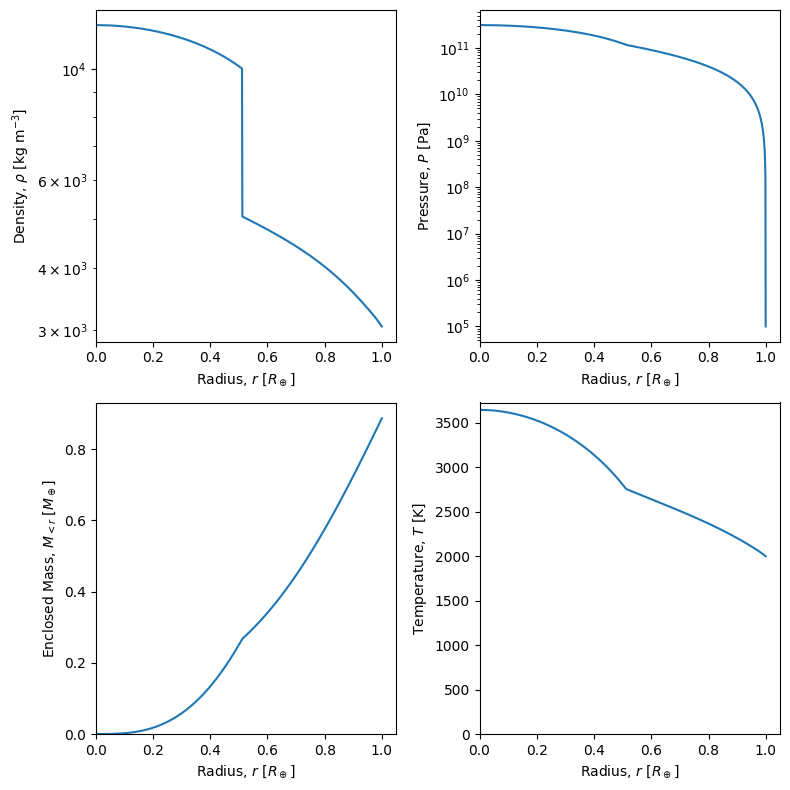

In [10]:
plot_spherical_profiles(target_prof)

In [ ]:
plot_spherical_profiles(impactor_prof)

Iter 1(15),1(30): R0=0.5112R_E R1=0.9917R_E: tol=0.07(0.01), 0.097(0.01)
Iter 1(15),2(30): R0=0.5105R_E R1=0.9845R_E: tol=0.064(0.01), 0.066(0.01)
Iter 1(15),3(30): R0=0.5101R_E R1=0.9781R_E: tol=0.06(0.01), 0.037(0.01)
Iter 1(15),4(30): R0=0.5101R_E R1=0.9724R_E: tol=0.057(0.01), 0.014(0.01)
Iter 1(15),5(30): R0=0.5093R_E R1=0.9673R_E: tol=0.044(0.01), -0.0015(0.01)
Iter 1(15),16(30): R0=0.503R_E R1=0.967R_E: tol=0.0043(0.01), 0.0054(0.01)

SpinPlanet "None": 
    planet       = "target"
    period       = 4  h
    M            = 5.3237e+24  kg  = 0.89138  M_earth
    R_eq         = 6.7587e+06  m  = 1.0609  R_earth
    R_po         = 5.8074e+06  m  = 0.91153  R_earth
    mat          = ["ANEOS_Fe85Si15", "ANEOS_forsterite"] 
    mat_id       = [402, 400] 
    R_layer      = [0.53443, 1.0609]  R_earth
    Z_layer      = [0.48092, 0.91199]  R_earth
    M_layer      = [0.26728, 0.6241]  M_earth
    M_frac_layer = [0.29985, 0.70015]  M_tot
    P_s          = 1.7817e+06  Pa
    T_s        

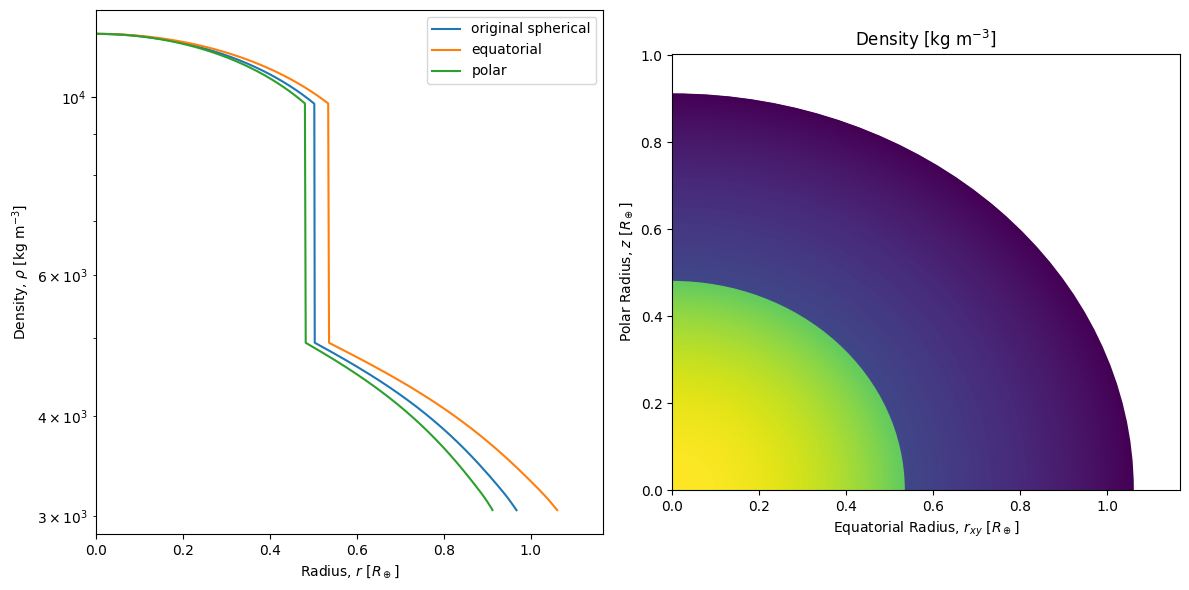

In [14]:
target_spin = woma.SpinPlanet(
    planet = target_prof,
    period = 4, # h
)
plot_spinning_profiles(target_spin)

Iter 1(15),1(30): R0=0.2981R_E R1=0.563R_E: tol=0.015(0.01), 0.0032(0.01)
Iter 1(15),16(30): R0=0.295R_E R1=0.563R_E: tol=-0.019(0.01), 0.007(0.01)
Iter 1(15),17(30): R0=0.297R_E R1=0.563R_E: tol=0.0044(0.01), 0.0044(0.01)

SpinPlanet "None": 
    planet       = "impactor"
    period       = 10  h
    M            = 7.9697e+23  kg  = 0.13344  M_earth
    R_eq         = 3.6461e+06  m  = 0.5723  R_earth
    R_po         = 3.5566e+06  m  = 0.55824  R_earth
    mat          = ["ANEOS_Fe85Si15", "ANEOS_forsterite"] 
    mat_id       = [402, 400] 
    R_layer      = [0.30145, 0.5723]  R_earth
    Z_layer      = [0.29568, 0.55825]  R_earth
    M_layer      = [0.0399, 0.093542]  M_earth
    M_frac_layer = [0.29901, 0.70099]  M_tot
    P_s          = 3.9353e+07  Pa
    T_s          = 2000.6  K
    rho_s        = 3054.7  kg m^-3
    P_1          = 2.284e+10  Pa
    T_1          = 2244.2  K
    rho_1        = 7763.4  kg m^-3
    P_0          = 5.8286e+10  Pa
    T_0          = 2794.7  K
    rho_0

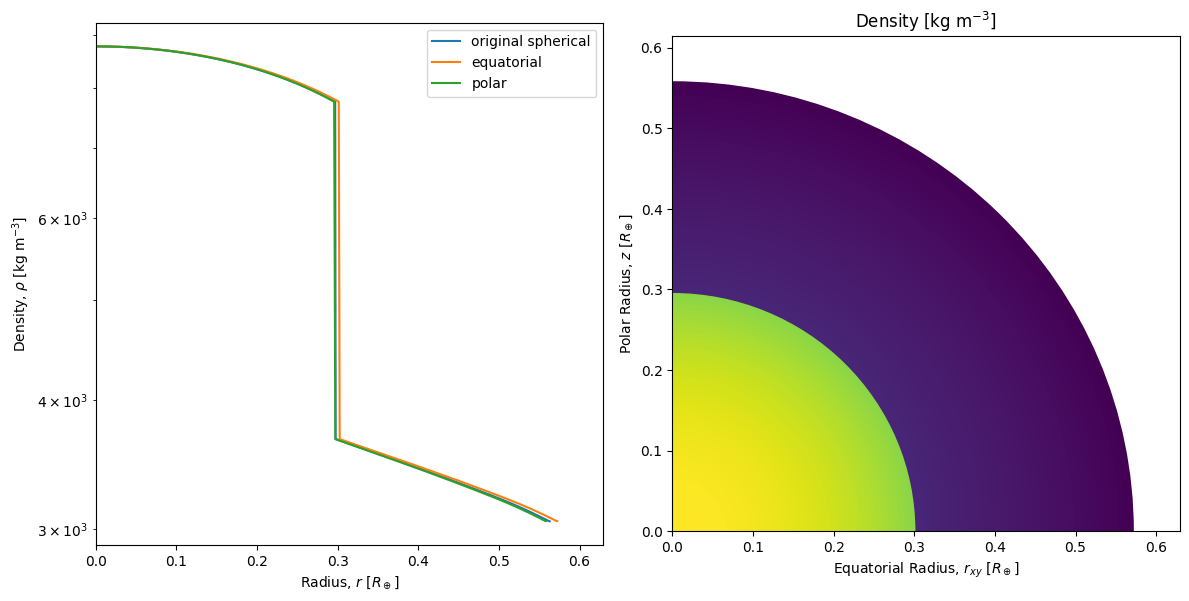

In [13]:
impactor_spin = woma.SpinPlanet(
    planet = impactor_prof,
    period = 10, # h
)
plot_spinning_profiles(impactor_spin)

In [15]:
!pwd

/home/lacruzen/Desktop/swift-cmgi/SpinImpactInitCond


In [16]:
!ls /home/lacruzen/Desktop/swift-cmgi/SpinImpactInitCond

'demo1 profiles'		   make_impact_init_cond.py
 demo2				   make_init_cond.py
 demo3				   output_n50_i.txt
 demo4				   output_n50_t.txt
 demo5				   plot_profiles.py
 demo6				   plot_snapshots.py
 demo_impact_n50.hdf5		   README.md
 demo_impactor_n50.hdf5		   restart
 demo_impactor_n50.yml		   run.sh
 demo_impactor_profile.hdf5	   snapshots
 demo_impactor_spin_profile.hdf5   statistics.txt
'demo profiles'			   task_level_0.txt
 demo_target_n50.hdf5		   testing.ipynb
 demo_target_n50.yml		   timesteps.txt
 demo_target_profile.hdf5	   unused_parameters.yml
 demo_target_spin_profile.hdf5	   used_parameters.yml
 dependency_graph_0.csv


In [18]:
!pip install swiftsimio

INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 7.2 MB/s  0:00:00m 7.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s  0:00:05 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 11.0 MB/s  0:00:011.2 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 10.7 MB/s  0:00:00 10.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 8.6 MB/s  0:00:00
  Attempting uninstall: numpym╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/7 [sympy]
    Found existing installation: numpy 1.23.5━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/7 [sympy]
    Uninstalling numpy-1.23.5:━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/7 [numpy]py]
      Successfully uninstalled numpy-1.23.5╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/7 [numpy]
  Attempting uninstall: llvmlite╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/

In [21]:
from swiftsimio import load
from swiftsimio.visualisation.slice import slice_gas
from swiftsimio.visualisation.projection import project_gas
import h5py

ImportError: cannot import name 'vecdot' from 'numpy' (/home/lacruzen/swift_venv/lib/python3.10/site-packages/numpy/__init__.py)